In [ ]:
#https://www.jobkorea.co.kr/Search/?stext=%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EB%B6%84%EC%84%9D&focusTab=&focusGno=43641436&tabType=recruit&Page_No=10

#필요한 모듈
import requests 
from bs4 import BeautifulSoup as bs

In [ ]:
#url 만들기
base_url = 'https://www.jobkorea.co.kr/Search/?stext=%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EB%B6%84%EC%84%9D&focusTab=&focusGno=43641436&tabType=recruit&Page_No='

page_no=1
url = f'{base_url}{page_no}' #문자열(url) 과 숫자형(page_no)를 연결처리

url

In [ ]:
resp = requests.get(url)

resp

bs(resp.content, 'html.parser')

In [ ]:
headers = {"User-Agent" : "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/121.0.0.0 Safari/537.36"}

resp = requests.get(url, headers = headers)

resp.text

soup = bs(resp.text, 'html.parser')

soup

In [ ]:
# 요구 경력 조회
exp_tags = soup.select('span.exp') # '.' 은 클래스

exp_list = []

for tag in exp_tags:
    exp_list.append(tag.text)

exp_list


# 요구학력 조회
edu_tags = soup.select('span.edu')

edu_tags

edu_list = []

for tag in edu_tags:
    edu_list.append(tag.text)

edu_list

In [ ]:
# 함수화 시키기: 경력 찾는 함수
def getExp(soup):
    exp_tags = soup.select('span.exp') # '.' 은 클래스

    exp_list = []

    for tag in exp_tags:
        exp_list.append(tag.text)

    return exp_list 


getExp(soup)

# 함수화 시키기: 학력 찾는 함수
def getEdu(soup):
    edu_tags = soup.select('span.edu')

    edu_tags

    edu_list = []

    for tag in edu_tags:
        edu_list.append(tag.text)

    return edu_list

getEdu(soup)

In [41]:
import math

83/20
math.ceil(83/20) #올림 처리해주는 함수 math.ceil()


total_string = soup.select('.dev_tot')[0].text #string 10,871

#replace(): 특정 문자를 내가 원하는 문자로 변경해준다.
total_string = total_string.replace(',', '') #',' 를 빈문자열 '' 로 대체해라

total_page = math.ceil(int(total_string) /20) #544 >> 총 544페이지 (20은 한 페이지에 표출되는 데이터의 개수)

total_page

544

In [46]:
# 함수화 시키기: 총 페이지 수 찾는 함수
def getTotalPage(soup):
    total_string = soup.select('.dev_tot')[0].text #string 10,871

    #replace(): 특정 문자를 내가 원하는 문자로 변경해준다.
    total_string = total_string.replace(',', '') #',' 를 빈문자열 '' 로 대체해라

    total_page = math.ceil(int(total_string) /20) #544 >> 총 544페이지 (20은 한 페이지에 표출되는 데이터의 개수)

    return total_page

getTotalPage(soup)

544

In [43]:
# 필요한 모듈 import
import requests as req
from bs4 import BeautifulSoup as bs
import math

# 기타 준비물
base_url = 'https://www.jobkorea.co.kr/Search/?stext=%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EB%B6%84%EC%84%9D&focusTab=&focusGno=43641436&tabType=recruit&Page_No='

page_no = 1

url = f'{base_url}{page_no}'
headers = {"User-Agent" : "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/121.0.0.0 Safari/537.36"}


# 경력 조회 함수
def getExp(soup) :
    exp_tags = soup.select('span.exp')
    exp_list = []

    for tag in exp_tags :
        exp_list.append(tag.text)

    return exp_list

# 학력 조회 함수
def getEdu(soup) :
    edu_tags = soup.select('span.edu')
    edu_list = []

    for tag in edu_tags :
        edu_list.append(tag.text)

    return edu_list

# 전체 페이지 조회 함수
def getTotalPage(soup):
    total_string = soup.select('.dev_tot')[0].text
    total_string = total_string.replace(',', '')
    total_page = math.ceil( int(total_string) / 20 )

    return total_page



In [56]:
# 요청 보내기
resp = req.get(url, headers = headers)
html = resp.text

soup = bs(html, 'html.parser')

# 전체 페이지 수 가져오기
getTotalPage(soup)

# 전체 페이지 데이터를 담을 리스트 생성
edu_results = []
exp_results = []

for page in range(10):
    url = f'{base_url}{page_no}'

    resp = req.get(url, headers=headers)
    html = resp.text

    soup = bs(html, 'html.parser')

    edu_list = getEdu(soup)
    exp_list = getExp(soup)

    edu_results += edu_list
    exp_results += exp_list

    page_no += 1



In [58]:
#len() : 배열의 길이
len(edu_results) 
len(exp_results)

300

In [66]:
import pandas as pd

# 요구학력을 시리즈 객체로 변환
s_edu = pd.Series(edu_results)

# 요구경력을 시리즈 객체로 변환
s_exp = pd.Series(exp_results)

# 시리즈 객체가 지원하는 value_counts()를 사용하여 각 항목이 몇 번 등장했는지 구한다 (카테고리별 갯수: .value_counts() )
count_edu = s_edu.value_counts() #Name: count, dtype: int64 // 
count_exp = s_exp.value_counts() #Name: count, dtype: int64

# 데이터의 구조 파악하는거 중요(데이터셋의 타입) : 결과는 시리즈 객체이다.
type(count_edu) #pandas.core.series.Series
type(count_exp) #pandas.core.series.Series

pandas.core.series.Series

In [76]:
# 요구학력 시리즈 객체를 데이터 프레임으로 변경
# 시리즈객체.reset_index() : 기존의 인덱스를 하나의 컬럼으로 변경하여 "데이터프레임"으로 반환한다.
df_edu = count_edu.reset_index()

# 변환된 데이터 프레임의 컬럼명을 재정의(수정)한다.
df_edu.columns = ['요구 학력', '집계'] 
df_edu

# 요구경력
df_exp = count_exp.reset_index()
df_exp.columns = ['요구 경력', '집계']
df_exp

# df 객체를 csv로 저장한다.
df_exp.to_csv('exp.csv', index=False)
df_edu.to_csv('edu.csv', index=False)

<class 'pandas.core.frame.DataFrame'>


In [83]:
# 시각화!
import matplotlib.pyplot as plt

df_edu = pd.read_csv('edu.csv') #한번에 csv 읽어오는 방법
df_edu

df_exp = pd.read_csv('exp.csv')
df_exp

# 정렬하기: 데이터프레임.sort_values(by='정렬기준이 될 컬럼명')
# ignore_index=True: 기존 인덱스를 무시하고 새로운 인덱스 부여
# inplace=True
df_exp.sort_values(by='요구 경력', ignore_index=True, inplace=True)

df_edu = pd.read_csv('edu.csv')
df_edu.sort_values(by='요구 학력', ignore_index=True, inplace=True)

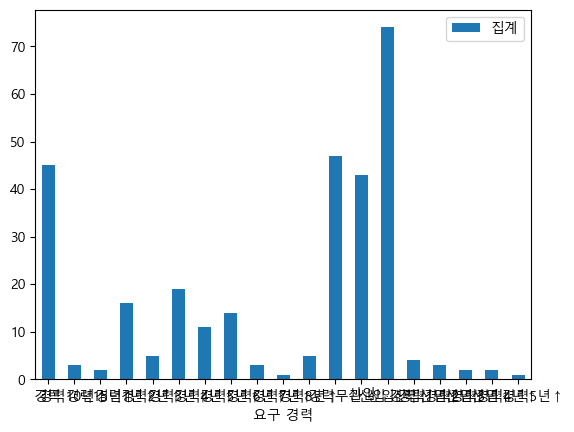

In [88]:
# matplotlib 은 기본적으로 한글을 못 읽는다(에러남) >> 한글 폰트를 직접 적용해야됨

# 한글 폰트 적용하기
from matplotlib import font_manager, rc
font_path = 'C:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
plt.rc('font', family = font_name) 

df_exp.plot(kind='bar', x='요구 경력', y='집계')

plt.xticks(rotation=0)

plt.show()

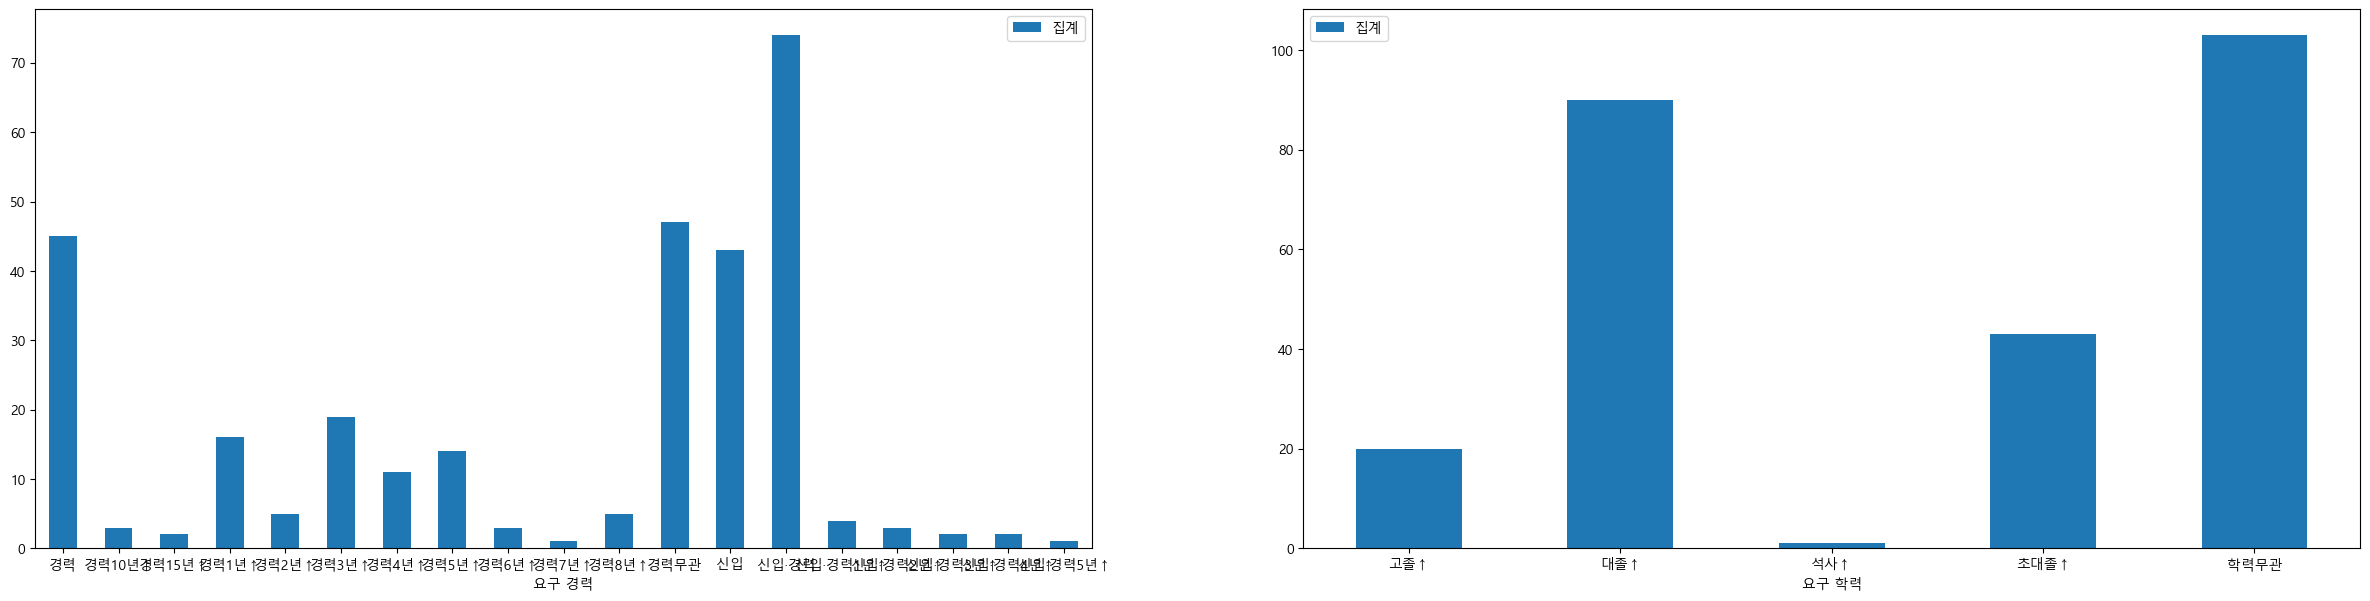

In [95]:
figure = plt.figure(figsize=(30, 7))
ax1 = figure.add_subplot(1, 2, 1)
ax2 = figure.add_subplot(1, 2, 2)


df_exp.plot(kind='bar', x='요구 경력', y='집계', ax=ax1)
df_edu.plot(kind='bar', x='요구 학력', y='집계', ax=ax2)

ax1.tick_params(axis='x', rotation=0)
ax2.tick_params(axis='x', rotation=0)

plt.savefig('my_graph.png')

plt.show()